<a href="https://colab.research.google.com/github/Daniel-Francisco-Calderon-Lebro/Vision_por_Computador/blob/main/conteo_y_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow # para visualizar imágenes
import matplotlib.pylab as plt
import pandas as pd

# Conteo de objetos

Usted debe desarrollar una algoritmo que indique la cantidad de elementos de cada color en una imagen.



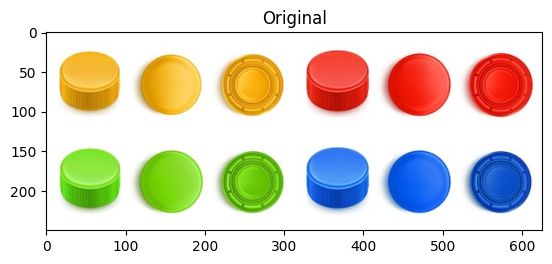

In [ ]:
URL = 'https://img.freepik.com/vector-gratis/tapon-plastico-colorido-botellas-cerveza-soda-agua_107791-16233.jpg?size=626&ext=jpg'
img = io.imread(URL)
plt.imshow(img)
plt.title('Original');

Se propone desarrollar una solución bajo el siguiente esquema.

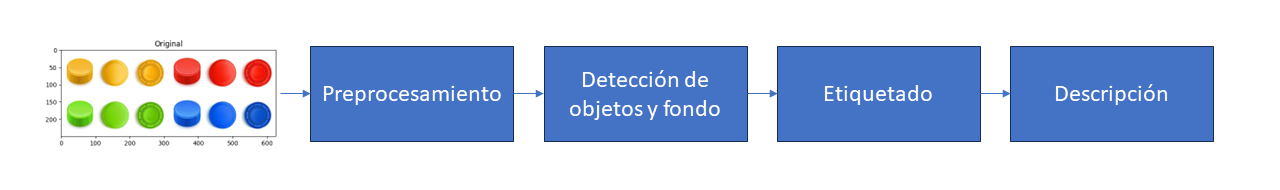

## Preprocesamiento

- Se pasa a niveles de gris
- Se filtra
- Se mejora contraste
- Se corrige iluminación dispareja
- ¿Otras?


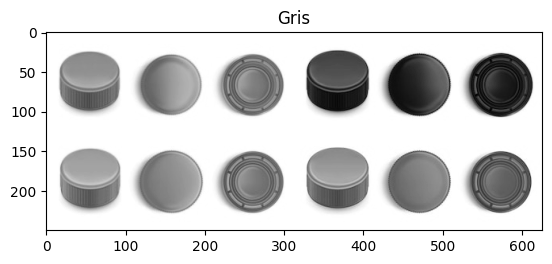

In [ ]:

imgGris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(imgGris,'gray')
plt.title('Gris');


## Se detectan objetos y fondo
- Se umbraliza.

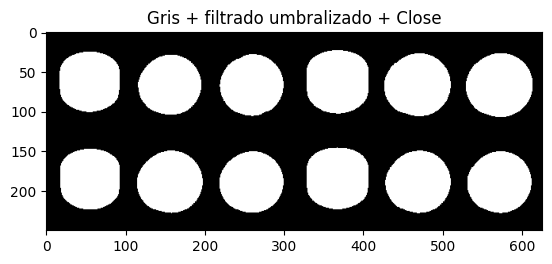

In [ ]:
_, imgUmbral = cv.threshold(imgGris,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
imgUmbral = 255 - imgUmbral
imgUmbral = cv.morphologyEx(imgUmbral,cv.MORPH_CLOSE,np.ones((9,9),np.uint8))
plt.imshow(imgUmbral,'gray')
plt.title('Gris + filtrado umbralizado + Close');


## Etiquetado

Cada región detectada se describe. Observe que el método de etiquetado `cv.connectedComponentsWithStats` devuelve parte de la información asociada a cada región.

¿Qué devuelve `cv.connectedComponentsWithStats`?

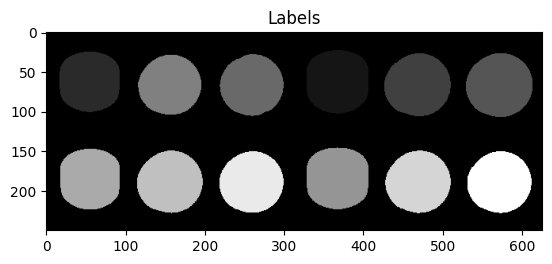

In [ ]:
num_labels, imgLabels, stats, centroids = cv.connectedComponentsWithStats(imgUmbral,connectivity=4)#con píxeles conectados
plt.imshow(imgLabels.astype('uint8'),'gray')
plt.title('Labels');


In [ ]:
num_labels

13

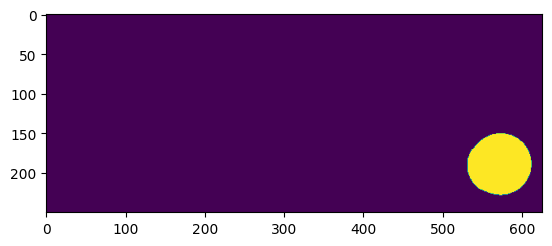

In [ ]:
plt.imshow(imgLabels==12)

En el siguiente código se agrupa la información en un dataframe y se consulta el nivel de cada banda en el píxel central de cada región.

- Encuentre una forma para averiguar qué color tiene cada región

In [ ]:
zonas = pd.DataFrame(columns = [['label','centroidF','centroidC']])
N = range(imgLabels.max())
temp = zonas.copy()
for L in N:
  regionL = np.where(imgLabels == L,1,0)
  temp['label'] = [L]
  temp['centroidC'] = [round(centroids[L,0])]
  temp['centroidF'] = [round(centroids[L,1])]
  temp['R en centroide'] = img[temp['centroidF'],temp['centroidC'],0]
  temp['G en centroide'] = img[temp['centroidF'],temp['centroidC'],1]
  temp['B en centroide'] = img[temp['centroidF'],temp['centroidC'],2]
  zonas = pd.concat([zonas,temp],axis = 0)
zonas = zonas.reset_index().drop(columns='index')
zonas

<ipython-input-21-c6609e75c4af>:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  zonas = zonas.reset_index().drop(columns='index')


,label,centroidF,centroidC,R en centroide,G en centroide,B en centroide
0,0,123,310,255.0,255.0,255.0
1,1,63,368,247.0,86.0,78.0
2,2,63,55,248.0,197.0,80.0
3,3,67,469,246.0,39.0,21.0
4,4,68,572,253.0,36.0,19.0
5,5,68,259,253.0,181.0,21.0
6,6,67,156,247.0,194.0,52.0
7,7,184,368,77.0,152.0,245.0
8,8,185,55,150.0,233.0,83.0
9,9,189,156,124.0,216.0,19.0


Ajuste su código para entregar las cantidades de cada color en un diccionario.

In [ ]:
color_counts = {'rojo': 0, 'verde': 0, 'azul': 0, 'amarillo': 0}


{'rojo': 0, 'verde': 0, 'azul': 0, 'amarillo': 0}


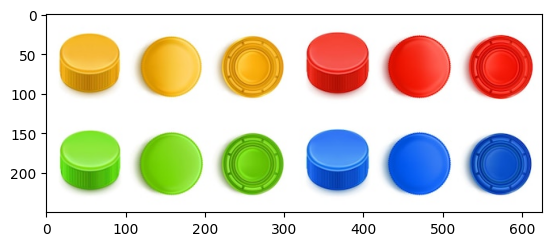

In [ ]:
plt.imshow(img)
print(color_counts)

- Encuentre el área de cada región.

# Ejercicio

Encuentre cuántos granos maduros hay en esta imagen.
 URL https://scontent.feoh3-1.fna.fbcdn.net/v/t1.6435-9/159075246_237343264789069_4015449241767049123_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_ohc=BgrqhWn0BLoAb7H9Uu1&_nc_ht=scontent.feoh3-1.fna&oh=00_AfB4YuPkes-7RNT9vRSM-vIPV79A005h8HoaAEHPdjaEIQ&oe=66378705

 Tome el código elaborado antes como base.


![https://scontent.feoh3-1.fna.fbcdn.net/v/t1.6435-9/159075246_237343264789069_4015449241767049123_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_ohc=BgrqhWn0BLoAb7H9Uu1&_nc_ht=scontent.feoh3-1.fna&oh=00_AfB4YuPkes-7RNT9vRSM-vIPV79A005h8HoaAEHPdjaEIQ&oe=66378705](https://scontent.feoh3-1.fna.fbcdn.net/v/t1.6435-9/159075246_237343264789069_4015449241767049123_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_ohc=BgrqhWn0BLoAb7H9Uu1&_nc_ht=scontent.feoh3-1.fna&oh=00_AfB4YuPkes-7RNT9vRSM-vIPV79A005h8HoaAEHPdjaEIQ&oe=66378705)

Recomendación:
Enfóquese solamente en la bandeja de cerezómetro. Puede recortar la imagen a las coordenada apropiadas.`